# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [3]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [4]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including with clauses, as you wish. 

Once you have the data in a Pandas dataframe, you may write as much Python code as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible  and that the data visualization is clearly visible.



In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """


select 
    s.city as store_name,
    extract(month from sa.sale_date) as month_number,
    to_char(sa.sale_date, 'Month') as month,
    sum(sa.total_amount) as total_sales_dollar,
    round((sum(sa.total_amount)/power(10.0,6)),1) as total_sales_million_dollars,
    count(*) as total_number_of_sales,
    round(sum(sa.total_amount)/count(*),2) as average_dollar_amount_per_sale
from sales as sa
    left outer join stores as s
        on sa.store_id = s.store_id

group by store_name, month_number, month
order by store_name, month_number



"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,store_name,month_number,month,total_sales_dollar,total_sales_million_dollars,total_number_of_sales,average_dollar_amount_per_sale
0,Berkeley,1,January,1988904,2.0,31045,64.07
1,Berkeley,2,February,1930272,1.9,30062,64.21
2,Berkeley,3,March,2224500,2.2,34704,64.10
3,Berkeley,4,April,2092056,2.1,32589,64.20
4,Berkeley,5,May,2019264,2.0,31485,64.13
5,Berkeley,6,June,2065140,2.1,32153,64.23
6,Berkeley,7,July,2034708,2.0,31582,64.43
7,Berkeley,8,August,2286732,2.3,35676,64.10
8,Berkeley,9,September,1922256,1.9,29876,64.34
9,Berkeley,10,October,2248008,2.2,35199,63.87


# Python

In [6]:
df_b = df[df['store_name'] == 'Berkeley']
df_d = df[df['store_name'] == 'Dallas']
df_m = df[df['store_name'] == 'Miami']
df_n = df[df['store_name'] == 'Nashville']
df_s = df[df['store_name'] == 'Seattle']

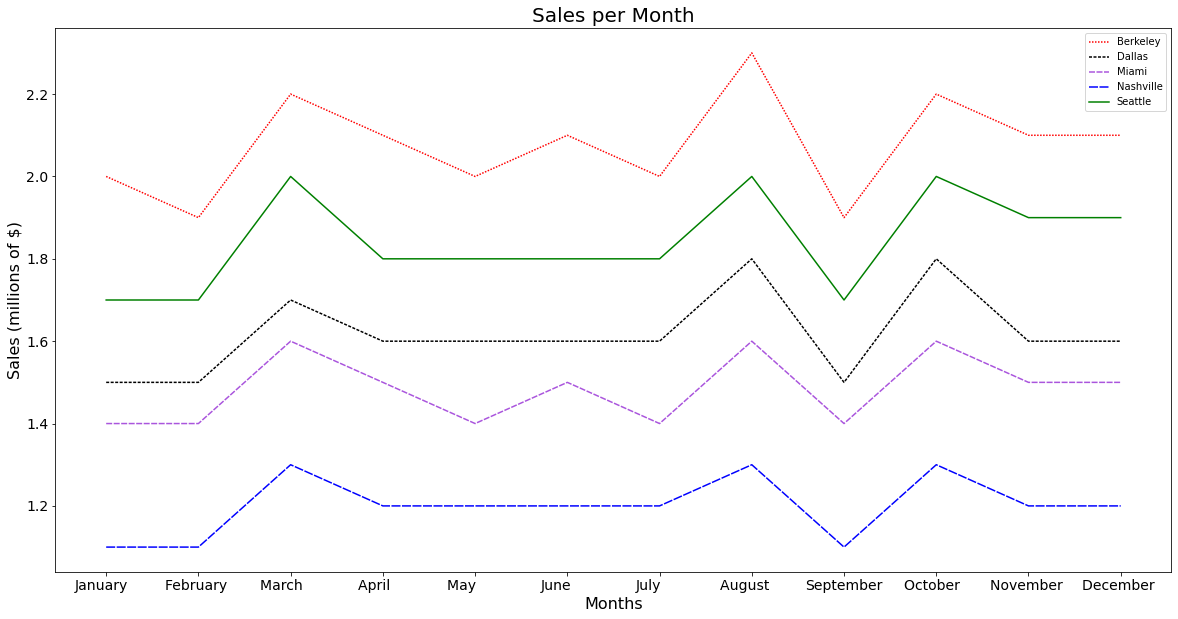

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df_b.month, df_b.total_sales_million_dollars, color = 'red', linestyle = (0,(1,1)), label = "Berkeley" )
plt.plot(df_d.month, df_d.total_sales_million_dollars, color = 'k', linestyle = (0,(2,1)), label = "Dallas" )
plt.plot(df_m.month, df_m.total_sales_million_dollars, color = '#aa55dd', linestyle= (0,(4,1)), label = "Miami" )
plt.plot(df_n.month, df_n.total_sales_million_dollars, color = 'blue', linestyle = (0,(6,1)), label = "Nashville" )
plt.plot(df_s.month, df_s.total_sales_million_dollars, color = 'green',  label = "Seattle" )

plt.legend()
plt.title("Sales per Month", fontsize=20)
plt.ylabel('Sales (millions of $)', fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.xticks( fontsize = 14)
plt.yticks(fontsize = 14)
pass

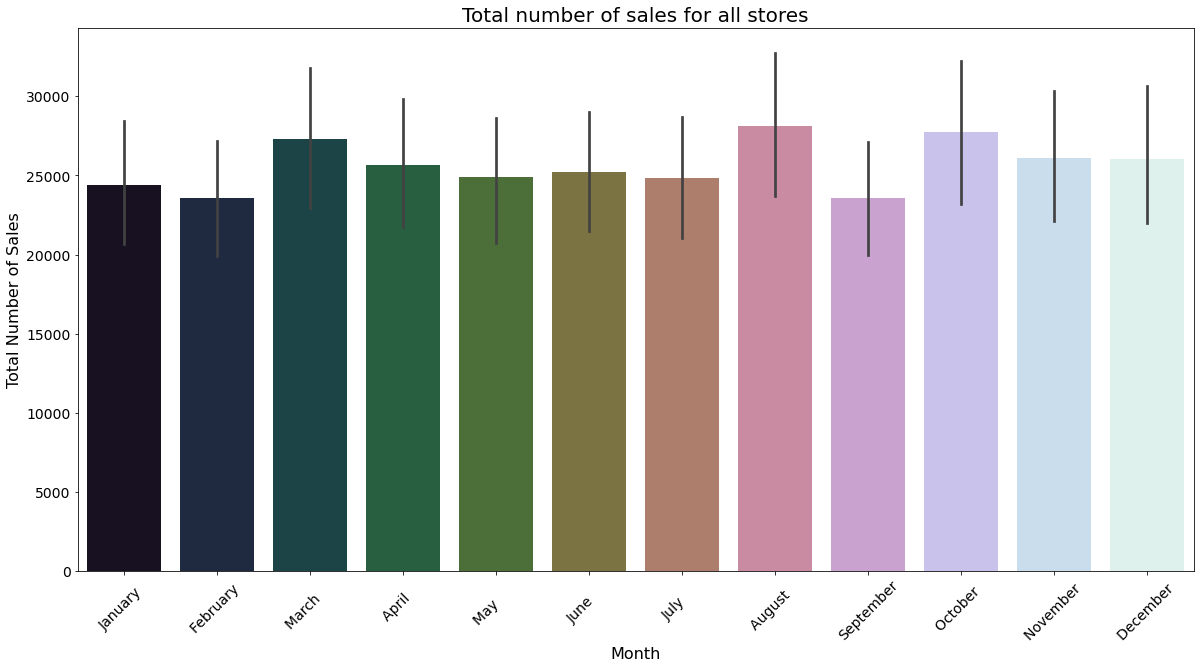

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'month', y ='total_number_of_sales' , palette = 'cubehelix', data = df)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Month", fontsize = 16)
plt.ylabel("Total Number of Sales", fontsize = 16)
plt.title("Total number of sales for all stores", fontsize = 20)
pass

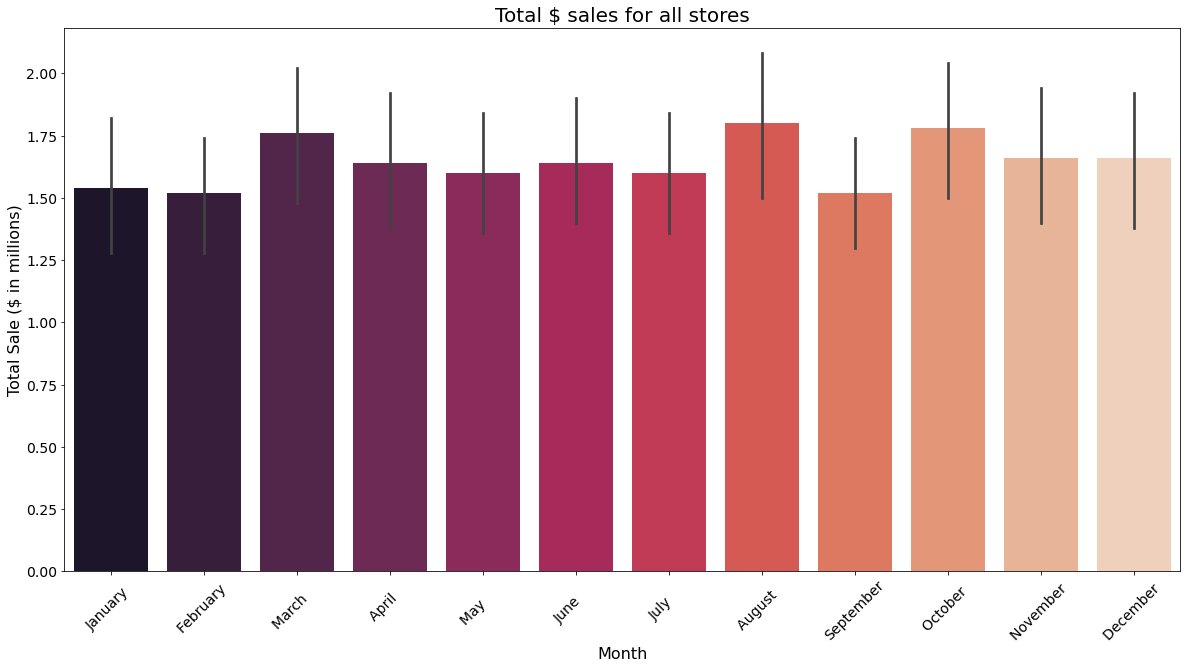

In [9]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'month', y ='total_sales_million_dollars' , palette = 'rocket', data = df)
plt.xticks(rotation=45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Month", fontsize = 16)

plt.ylabel('Total Sale ($ in millions)', fontsize = 16)
plt.title("Total $ sales for all stores", fontsize = 20)
pass

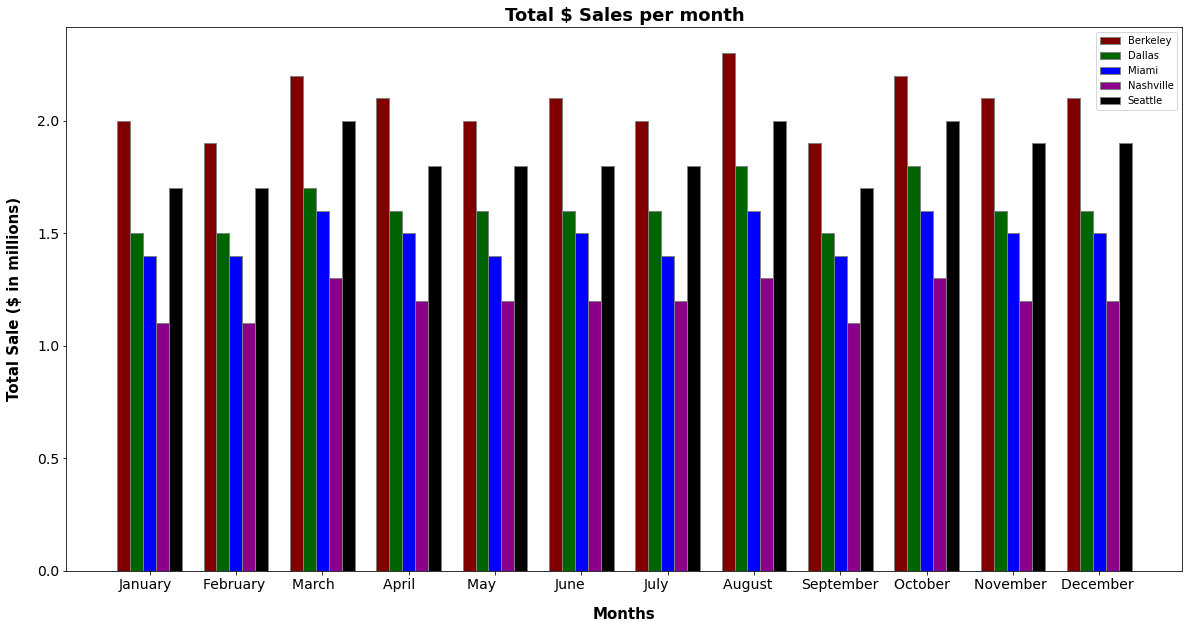

In [10]:
barWidth = 0.15
fig = plt.subplots(figsize =(20, 10))

# Set position of bar on X axis
br1 = np.arange(len(df_b.month))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, df_b.total_sales_million_dollars, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Berkeley')
plt.bar(br2, df_d.total_sales_million_dollars, color ='darkgreen', width = barWidth,
        edgecolor ='grey', label ='Dallas')
plt.bar(br3, df_m.total_sales_million_dollars, color ='b', width = barWidth,
        edgecolor ='grey', label ='Miami')
plt.bar(br4, df_n.total_sales_million_dollars, color ='darkmagenta', width = barWidth,
        edgecolor ='grey', label ='Nashville')
plt.bar(br5, df_s.total_sales_million_dollars, color ='black', width = barWidth,
        edgecolor ='grey', label ='Seattle')


# Y & X labels
plt.xlabel('Months', fontweight ='bold', fontsize = 15, loc = 'center', labelpad = 15)
plt.ylabel('Total Sale ($ in millions)', fontweight ='bold', fontsize = 15,  labelpad = 15)

plt.xticks(br1 + barWidth*2,
        df_b.month, rotation=0, fontsize = 14)
plt.yticks(fontsize =14)
plt.title("Total $ Sales per month",fontweight ='bold', fontsize = 18)
plt.legend()
plt.show()